In [135]:
import json

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [4]:
data_path = "../input/challenge-data/"

# train.csv

In [41]:
df = pd.read_csv(data_path+'train.csv', dtype=str)
df

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
...,...,...,...,...,...
19656,b3498176-8832-4033-aea6-b5ea85ea04c4,RSNA International Trends: A Global Perspectiv...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID Open Radiology Database,rsna international covid open radiology database
19657,f77eb51f-c3ac-420b-9586-cb187849c321,MCCS: a novel recognition pattern-based method...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19658,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,Quantitative Structure–Activity Relationship M...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...


In [42]:
df.describe()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
count,19661,19661,19661,19661,19661
unique,14316,14271,45,130,130
top,170113f9-399c-489e-ab53-2faf5c64c5bc,Science and Engineering Indicators 2014,Alzheimer's Disease Neuroimaging Initiative (A...,ADNI,adni
freq,22,22,6144,3673,3673


19661 rows but 14316 unique id  
→ some publications mention multiple datasets and thus appear on different rows  
14316 unique ids but 14271 unique pub_title  
→ some publications have the same title  

45 unique dataset_title but 130 dataset_label/cleaned_label  
→ publications refer to the same dataset (dataset_title: true name according to the organizers) in different ways (dataset_label)

## Publications with multiple datasets
__/!\\__ the training set is not exhaustively labeled / not all datasets have been identified in train  
→ if this means that there are datasets appearing in .json train files that are not identified in train.csv, then the following figures are not representative of the reality

In [92]:
datasets_per_paper = df['Id'].value_counts()
print((datasets_per_paper == 1).sum(), (datasets_per_paper == 1).sum()/len(datasets_per_paper))
print((datasets_per_paper == 2).sum(), (datasets_per_paper == 2).sum()/len(datasets_per_paper))

9563 0.6679938530315731
4410 0.3080469404861693


9563 papers (66,8%) cite only one dataset, 4410 (30,8%) cite two datasets.  
97,6% cite one or two datasets.

<AxesSubplot:>

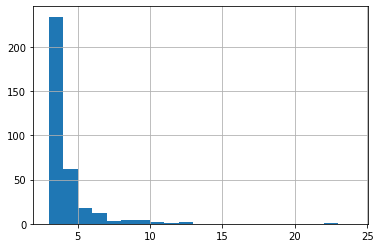

In [98]:
datasets_per_paper[datasets_per_paper != 1].hist(bins=np.arange(25)[3:])

## Publications with same title

In [162]:
tmp = df[~df.duplicated(['Id'])] # remove duplicate 'Id' (publication with multiple datasets)
same_title = tmp[tmp.duplicated('pub_title', keep=False)].groupby('pub_title')[['Id']].agg(list)#sort_values('pub_title')
same_title

,Id
pub_title,
A quantitative examination of lightning as a predictor of peak winds in tropical cyclones,"[d1954347-2b50-4b06-991a-6e6d018aee98, 64e61b3..."
A structural equation model for imaging genetics using spatial transcriptomics,"[6120275e-3ba8-4e1e-af75-30fd907fc24a, c694fcd..."
"Agricultural Resources and Environmental Indicators, 2012 Edition","[126351b2-11fc-4c32-9beb-62a593531b0a, a2c28b4..."
Alzheimer's disease Archimedes condition-event simulator: Development and validation,"[77ac09b9-cbec-4c12-a4fa-b392cbcca181, a7d4c1e..."
Assessing the oceanic control on the amplitude of sea surface cooling induced by tropical cyclones,"[79faa12f-d122-49a6-8182-ff6146081a6f, aa75f8b..."
Basal forebrain volume reliably predicts the cortical spread of Alzheimer’s degeneration,"[a768a188-6de7-4414-934f-436c806dd2b8, e2bd935..."
"Characteristics and Production Costs of U.S. Hog Farms, 2004","[4d36bb2d-e128-48b3-8b52-5193adcb3d3a, 9a26ef5..."
Characterizing biomarker features of cognitively normal individuals with ventriculomegaly,"[4f6e6a31-66a4-498c-9abb-2a08e60cb124, 8e789ed..."
"Climate Change, Heat Stress, and U.S. Dairy Production","[14f2137d-f9b6-4203-aae8-3b6b8fbe0d93, d6a7989..."


In [171]:
same_title.iloc[0].Id

['d1954347-2b50-4b06-991a-6e6d018aee98',
 '64e61b31-f198-4925-8aed-f9cbcf1b8a96']

In [167]:
with open(data_path+'train/'+same_title.iloc[0].Id[0]+'.json') as f:
  f1 = json.load(f)
with open(data_path+'train/'+same_title.iloc[0].Id[1]+'.json') as f:
  f2 = json.load(f)

In [175]:
pprint(f1[-1])

{'section_title': 'Conclusions',
 'text': 'We have recreated the Price approach for a set of 58 tropical '
         'cyclones but were unable to duplicate the exact results that were '
         'found in this study. However, we confirmed their broad conclusions '
         'that the observed lightning variability is correlated to wind '
         'variability and that on average, the lightning variation leads the '
         'wind variation by ∼1 day. The Price approach has been extended from '
         'the original 3 years of data to an 8 year data set which returns '
         'broadly similar lag and correlation results when using a lightning '
         'collection window of 10\n'
         '• square or of 500 km radius. The cross-correlation matching between '
         'wind and lightning only has an ∼8% failure rate. We have calculated '
         'both the 10\n'
         '• × 10\n'
         '• square lightning detection window, a radial distance in '
         'kilometers, and performe

In [176]:
pprint(f2[-1])

{'section_title': 'Conclusions',
 'text': 'We have recreated the Price approach for a set of 58 tropical '
         'cyclones but were unable to duplicate the exact results that were '
         'found in this study. However, we confirmed their broad conclusions '
         'that lightning variability seems to be correlated to wind '
         'variability and that on average, the lightning variation leads the '
         'wind variation by ∼1 day. The Price approach has been extended from '
         'the original 3 years of data to an 8 year dataset which returns '
         'broadly similar lag and correlation results when using a lightning '
         'collection window of 10 • square or of 500 km radius. The cross '
         'correlation matching between wind and lightning only has an ∼8% '
         'failure rate. We have calculated both the 10 • x 10 • square '
         'lightning detection window, a radial distance in kilometers, and '
         'performed the lightning to wind cross co

In [177]:
same_title.iloc[1].Id

['6120275e-3ba8-4e1e-af75-30fd907fc24a',
 'c694fcdd-50a8-4018-a295-e4310cfb4dd5']

In [178]:
with open(data_path+'train/'+same_title.iloc[1].Id[0]+'.json') as f:
  f1 = json.load(f)
with open(data_path+'train/'+same_title.iloc[1].Id[1]+'.json') as f:
  f2 = json.load(f)

In [194]:
pprint(f1[0:2])

[{'section_title': 'Abstract',
  'text': 'Imaging genetics deals with relationships between genetic variation '
          'and imaging variables, often in a disease context. The complex '
          'relationships between brain volumes and genetic variants have been '
          'explored with both dimension reduction methods and model-based '
          'approaches. However, these models usually do not make use of the '
          'extensive knowledge of the spatio-anatomical patterns of gene '
          'activity. We present a method for integrating genetic markers '
          '(single nucleotide polymorphisms) and imaging features, which is '
          'based on a causal model and, at the same time, uses the power of '
          'dimension reduction. We use structural equation models to find '
          'latent variables that explain brain volume changes in a disease '
          'context, and which are in turn affected by genetic variants. We '
          'make use of publicly available 

In [195]:
pprint(f2[0:2])

[{'section_title': 'Abstract',
  'text': "Alzheimer's disease is a neurodegenerative disorder that causes "
          'changes in the structure of the brain, observable with MRI scans, '
          'and that has a strong heritable component, reflected in the DNA. '
          'Imaging genetics deals with such relationships between genetic '
          'variation and imaging variables, often in a disease context. The '
          'complex relationships between brain volumes and genetic variants '
          'have been explored both with dimension reduction methods and model '
          'based approaches. However, these models usually do not make use of '
          'the extensive knowledge of the spatio-anatomical patterns of gene '
          'activity. We present a method for integrating genetic markers '
          '(single nucleotide polymorphisms) and imaging features, which is '
          'based on a causal model and, at the same time, uses the power of '
          'dimension reduction. W

In [198]:
pprint(f1[-1:])

[{'section_title': 'Conclusion',
  'text': 'We have proposed the use of a maximum likelihood structural '
          'equation model for combining SNP data and structural brain area '
          'measurements. The model makes use of external gene expression data, '
          'to define groups of brain regions that may respond similarly to '
          'genetic variation. For each of these region groups, we define a '
          'latent variable, which captures the relationship between the '
          'regions in a group and genetic variation. We have applied the model '
          'to a simulated data set, to show it can capture disease-relevant '
          'variation and identify causal SNPs. In addition, we have applied '
          "the model to the ADNI data set, containing Alzheimer's patients, "
          'individuals with late mild cognitive impairment, and cognitive '
          'healthy controls. One SNP, linked to APOE, shows a reproducible '
          'significant relationship to t

In [199]:
pprint(f2[-2:])

[{'section_title': 'Conclusion',
  'text': 'We have proposed the use of a maximum likelihood structural '
          'equation model for combining SNP data and structural brain area '
          'measurements. The model makes use of external gene expression data, '
          'to define groups of brain regions that may respond similarly to '
          'genetic variation. For each of these region groups, we define a '
          'latent variable, which captures the relationship between the '
          'regions in a group and genetic variation. We have applied the model '
          'on a simulated dataset, to show it can capture disease relevant '
          'variation and identify causal SNPs. In addition, we have applied '
          "the model to the ADNI dataset, containing Alzheimer's patients, "
          'individuals with late mild cognitive impairment, and cognitive '
          'healthy controls. One SNP, linked to APOE, shows a reproducible '
          'significant relationship to the

We can see that these are not different publications with the same name, but the same publication duplicated in the train/ folders, with different ids.  
They sometime have a different abstracts, an extra section at the end.  
So they may be different versions of the same paper.

Indeed, for "A structural equation model for imaging genetics using spatial transcriptomics", the first id correspond to the Brain Informatics edition and the second is from Biorxiv.org

# dataset_title vs dataset_label

In [ ]:
# faire une df de dataset_title | [liste de dataset_labels]

In [ ]:
# voir comment est traité le cas où un même papier cite plusieurs fois le même dataset de façon différentes
# et lorsqu'un papier cite un dataset en juxtaposant le nom complet et l'acronyme. le train.csv sélectionne parfois le nom complet, et d'autres fois l'acronyme…

In [ ]:
# checker discussions kaggle à ce propos

# .json

# test set
public test set: ~1000 publications (12% of hidden test set)  
hidden test set: ~8000 publications (includes the public test set)